In [14]:
file="time_optimized_0_1000_delladisperazione2"
f = open(file+".txt")
l=[]
for line in f:
    l.append([w for w in line.replace("\t", " ").replace("\n", "").split(" ") if w != ''])
f.close()
# l[:3]

In [15]:
ll = []
i=0
while i<len(l):
    if "__" in l[i][0]:
        print(l[i])
        i+=1
    else:
        try:
            v, p, e = l[i][0][:-4].split("_")
            ll.append([int(v), float(p), int(e), float(l[i+1][1][:-1]), float(l[i+2][1][:-1]), float(l[i+3][1][:-1]), int(l[i+4][1]), int(l[i+5][1])])
            i+=6
        except:
            print([v, p, e, l[i+1][1][:-1], l[i+2][1][:-1], l[i+3][1][:-1], l[i+4][1], l[i+5][1]])
            i+=1
ll[1000]

[100, 0.091919, 874, 3.8e-05, 1.7e-05, 1.2e-05, 1, 1]

In [16]:
import csv
f = open(file+".csv", "w")
f.write("vertices,percentage,edges,tarjan,nuutila,pearce,components,correct\n")
w = csv.writer(f)
w.writerows(ll)
f.close()

In [17]:
import pandas as pd

In [18]:
t = pd.read_csv(file+".csv")
print(t.correct[t.correct==0].count())
#t = t[["vertices","percentage","edges", "tarjan", "nuutila", "pearce"]].groupby(by=["vertices","percentage","edges"], as_index=False).mean()

In [19]:
for alg in ["tarjan","nuutila","pearce"]:
    qt1=t[alg].quantile(0.99)
    print(alg, qt1)
    t = t[t[alg]<qt1]

tarjan 0.000144
nuutila 8.6e-05
pearce 5.3e-05


In [20]:
t= t[["vertices","edges","tarjan","nuutila", "pearce"]].groupby(by=["vertices","edges"], as_index=False).mean()
t["v+e"]=t["vertices"]+t["edges"]

In [21]:
#for n in ["tarjan", "nuutila", "pearce"]:
#    t[n] = t[n]/t["v+e"]

In [22]:
t.describe()

,vertices,edges,tarjan,nuutila,pearce,v+e
count,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000
mean,511.316852,492.182240,0.000049,0.000027,0.000021,1003.499092
std,286.976421,288.822664,0.000026,0.000013,0.000010,416.009851
min,10.000000,0.000000,0.000004,0.000002,0.000001,10.000000
25%,260.000000,240.000000,0.000029,0.000017,0.000013,700.250000
50%,510.000000,490.000000,0.000046,0.000026,0.000020,1008.000000
75%,760.000000,740.000000,0.000068,0.000037,0.000028,1309.000000
max,1000.000000,1002.000000,0.000126,0.000067,0.000045,2000.000000


/usr/lib64/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ae1f59f98>,
      dtype=object)

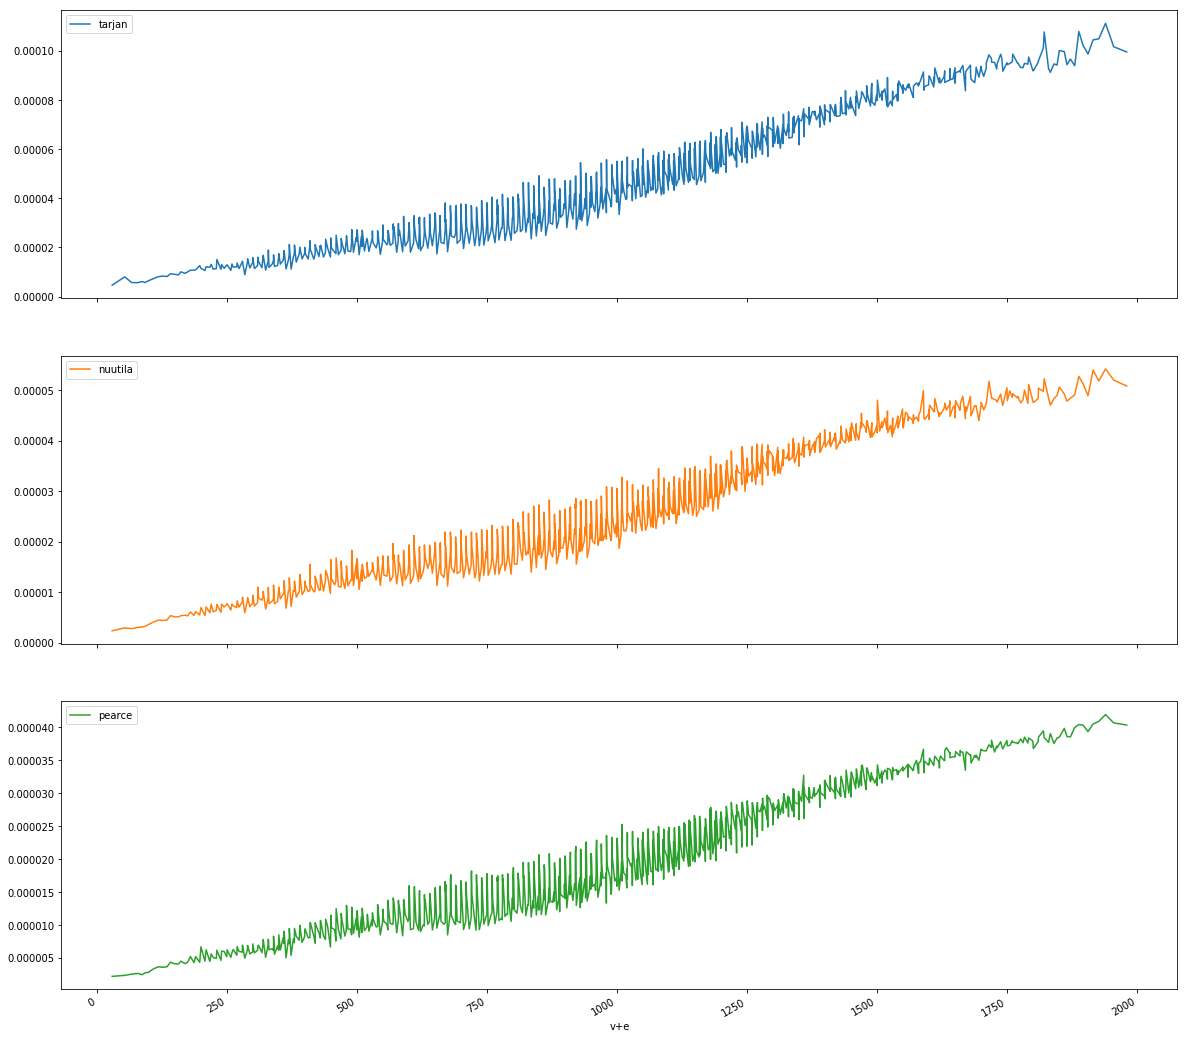

In [23]:
import numpy as np
import matplotlib.pyplot as plt
t = t.sort_values(by=["v+e","edges","vertices"])
t.groupby(np.arange(len(t))//10).mean().plot(x="v+e", y=["tarjan","nuutila","pearce"],figsize=(20,20), subplots=True)

/usr/lib64/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



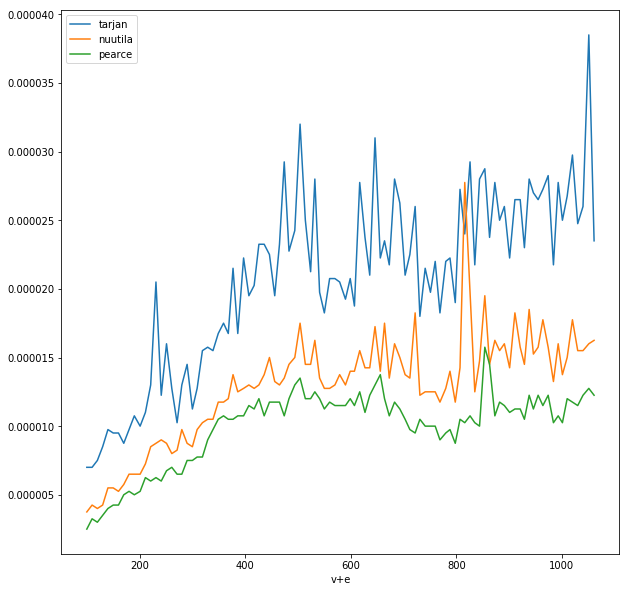

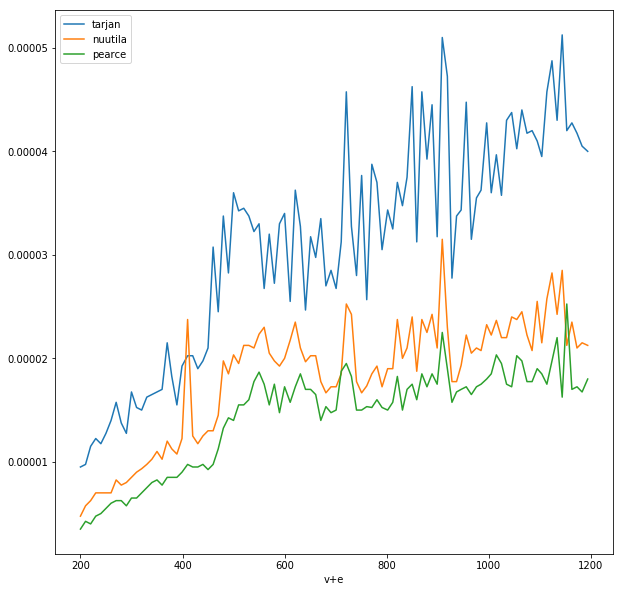

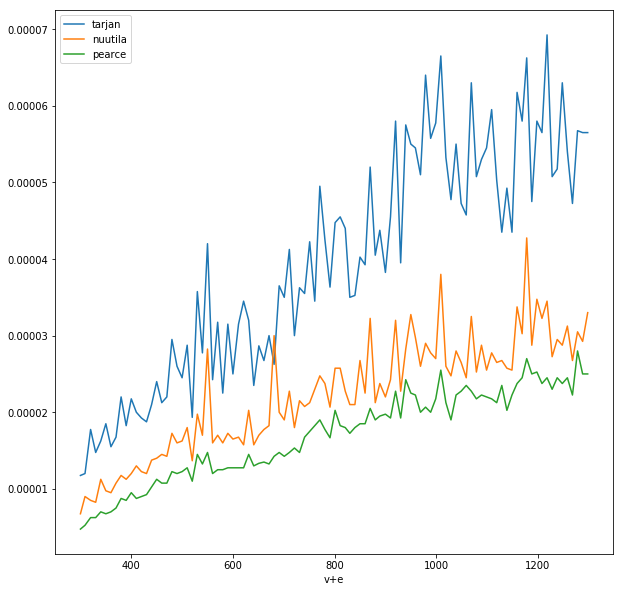

In [24]:
t[t["vertices"]==100].plot(x="v+e", y=["tarjan","nuutila","pearce"],figsize=(10,10))
t[t["vertices"]==200].plot(x="v+e", y=["tarjan","nuutila","pearce"],figsize=(10,10))
t[t["vertices"]==300].plot(x="v+e", y=["tarjan","nuutila","pearce"],figsize=(10,10))

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning:

invalid value encountered in reduce

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning:

invalid value encountered in reduce

/usr/lib64/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning:

invalid value encountered in less



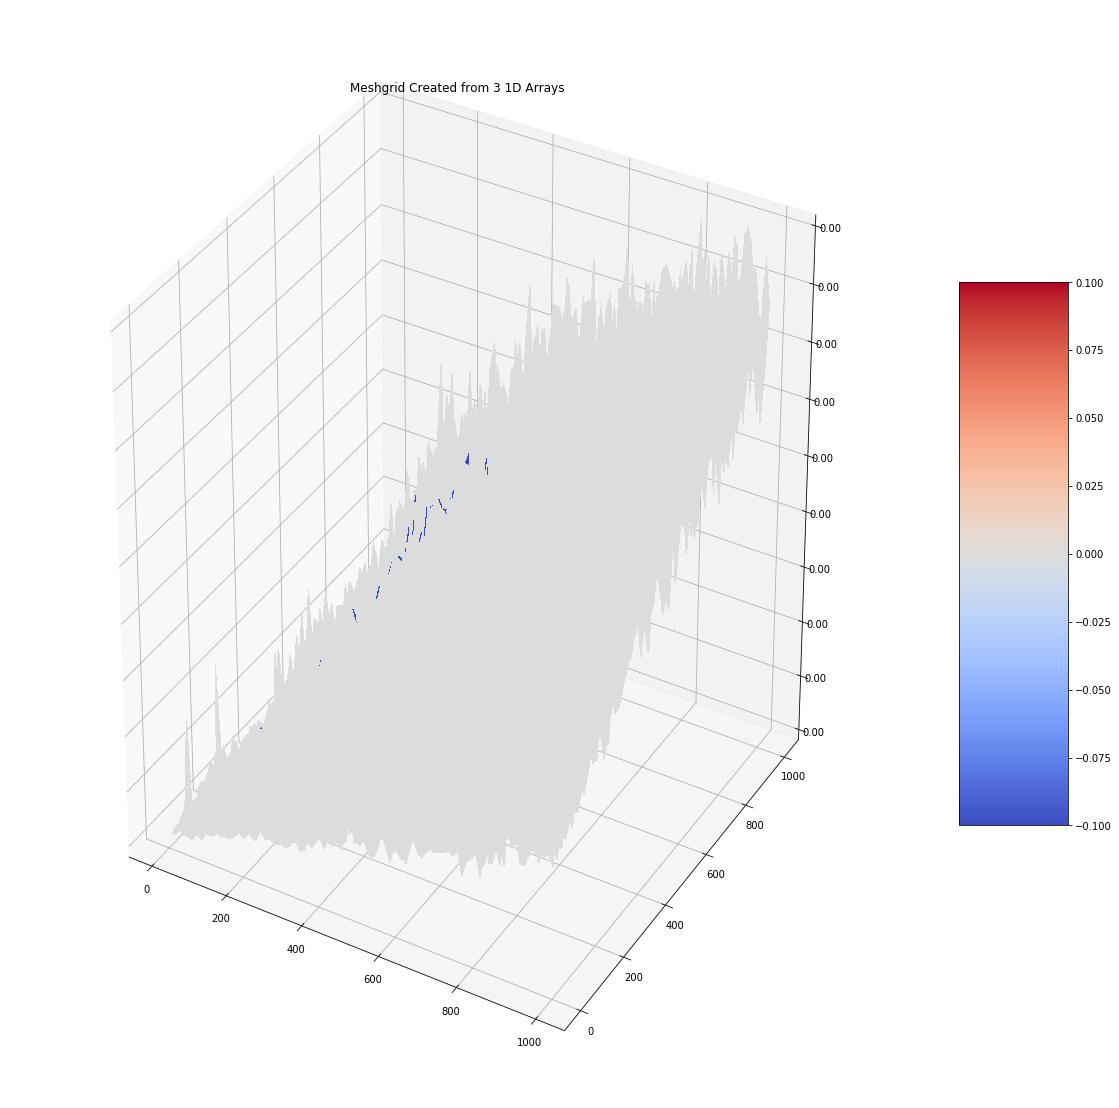

In [25]:
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

df=t
x1 = np.linspace(df['vertices'].min(), df['vertices'].max(), len(df['vertices'].unique()))
y1 = np.linspace(df['edges'].min(), df['edges'].max(), len(df['edges'].unique()))

"""
x, y via meshgrid for vectorized evaluation of
2 scalar/vector fields over 2-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.
"""

x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
z2 = griddata((df['vertices'], df['edges']), df['tarjan'], (x2, y2), method='cubic')

# Ready to plot
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Meshgrid Created from 3 1D Arrays')

plt.show()

#Modified example using <code>DataFrame</code> input

In [26]:


import plotly.plotly as py
import plotly.graph_objs as go
import plotly

import pandas as pd
plotly.tools.set_credentials_file(username='pscorso93', api_key='K4XqlXUNVsiWVSEtsFEZ')
# Read data from a csv
z_data = t
df=t
x1 = np.linspace(df['vertices'].min(), df['vertices'].max(), len(df['vertices'].unique()))
y1 = np.linspace(df['edges'].min(), df['edges'].max(), len(df['edges'].unique()))

"""
x, y via meshgrid for vectorized evaluation of
2 scalar/vector fields over 2-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.
"""

x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
z2 = griddata((df['vertices'], df['edges']), df['tarjan'], (x2, y2), method='cubic')

data = [
    go.Surface(
        x=x2,
        y=y2,
        z=z2
    )
]
layout = go.Layout(
    title='Tarjan',
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='elevations-3d-surface')



In [27]:


import plotly.plotly as py
import plotly.graph_objs as go
import plotly

import pandas as pd
plotly.tools.set_credentials_file(username='pscorso93', api_key='K4XqlXUNVsiWVSEtsFEZ')
# Read data from a csv
z_data = t
df=t
x1 = np.linspace(df['vertices'].min(), df['vertices'].max(), len(df['vertices'].unique()))
y1 = np.linspace(df['edges'].min(), df['edges'].max(), len(df['edges'].unique()))

"""
x, y via meshgrid for vectorized evaluation of
2 scalar/vector fields over 2-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.
"""

x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
z2 = griddata((df['vertices'], df['edges']), df['nuutila'], (x2, y2), method='cubic')

data = [
    go.Surface(
        x=x2,
        y=y2,
        z=z2
    )
]
layout = go.Layout(
    title='Nuutila',
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='elevations-3d-surface')



In [28]:


import plotly.plotly as py
import plotly.graph_objs as go
import plotly

import pandas as pd
plotly.tools.set_credentials_file(username='pscorso93', api_key='K4XqlXUNVsiWVSEtsFEZ')
# Read data from a csv
z_data = t
df=t
x1 = np.linspace(df['vertices'].min(), df['vertices'].max(), len(df['vertices'].unique()))
y1 = np.linspace(df['edges'].min(), df['edges'].max(), len(df['edges'].unique()))

"""
x, y via meshgrid for vectorized evaluation of
2 scalar/vector fields over 2-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.
"""

x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
z2 = griddata((df['vertices'], df['edges']), df['pearce'], (x2, y2), method='cubic')

data = [
    go.Surface(
        x=x2,
        y=y2,
        z=z2
    )
]
layout = go.Layout(
    title='Pearce',
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='elevations-3d-surface')

